<a href="https://colab.research.google.com/github/w4bo/AA2425-unibo-mldm/blob/master/slides/lab-05-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
subtitle: "Modeling and Evaluation"
---

# Modeling

Machine Learning is the science (and art) of programming computers so they can learn from data

> Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed (Arthur Samuel, 1959)

> A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E (Tom Mitchell, 1997)


# Types of machine learning

There are many types of Machine Learning algorithms

Classify them in broad categories, based on the following criteria:

- Whether they are trained with human supervision
    - Supervised, unsupervised, semi-supervised, and reinforcement learning
- Whether they can learn incrementally
    - Online, batch learning
- Whether they compare new to known data points, or detect patterns/models in the training
    - Instance-based, model-based learning


# scikit-learn: Machine Learning in Python

- This library is built upon NumPy, SciPy and Matplotlib
    - Open source and commercially usable
- Covers many algorithms
    - Supervised Learning algorithms: Linear Regression, Support Vector Machine, etc.
    - Unsupervised Learning algorithms: clustering, factor analysis, PCA, neural networks, etc.
    - Cross Validation: check the accuracy of supervised models on unseen data
    - Feature extraction: extract the features from data to define the attributes in image and text data


Check also:

- https://scikit-learn.org/stable/index.html
- https://scikit-learn.org/stable/modules/tree.html

In [1]:
import sklearn as sk

print(sk.__version__)

1.5.2


# scikit-learn

![](./img/modeling/sklearn.png)

# Estimator

**Estimator**: a consistent interface for a wide range of ML applications

- An algorithm that learns from the data (fitting the data) is an estimator
- It can be used with any of the algorithms like classification, regression, and clustering

All the parameters can be set when creating the estimator

```python
estimator = Estimator(param1=1, param2=2)
estimator.param1
```

All estimator objects expose a fit method that takes a dataset

```python
estimator.fit(X_train, y_train)
```

Once the estimator is fitted, all the estimated parameters will be the attributes of the estimator object ending by an underscore

```python
estimator.estimated_param_
```

Finally, you can predict unseen data

```python
y_pred = estimator.predict(X_test)
```

# scikit-learn in action

1. Choose a class of model
    - Import the appropriate Estimator class from Scikit-learn (e.g., a decision tree)
    - `from sklearn.tree import DecisionTreeClassifier`
1. Choose the model's hyperparameters
    - `clf = DecisionTreeClassifier(max_depth=2)`
1. Model Fitting
    - Fit the model by calling `.fit()` method of the model instance
    - `clf.fit(X_train, y_train)`
1. Applying the model to new data
    - For supervised learning, use `.predict()` method to predict the labels for unknown data.
    - `y_pred = clf.predict(X_test)`
1. Evaluate the performance
    - `from sklearn.metrics import accuracy_score; accuracy_score(y_test, y_pred)`

# Supervised learning

We focus on supervised learning tasks

- The training set you feed to the algorithm includes the desired solutions
- *Classification*
    - Approximating a mapping function (`f`) from input variables (`X`) to discrete output variables (`y`)
    - The output variables are called labels or categories
    - The mapping function predicts the class or category for a given observation
    - E.g., a spam filter is trained with many example emails along with their class (`spam` or `ham`)
- *Regression*
    - Approximating a mapping function (`f`) from input variables (`X`) to a continuous output variable (`y`)
    - A continuous output variable is a real-value, such as an integer or floating-point value
    - E.g., predict the price of a car given a set of features (`mileage`, `age`, `brand`, etc.) called predictors


# Training and test sets

For a supervised learning problem we need:

- Input data along with labels
- Split data between test and training set. How?

Scikit-learn uses data in the form of N-dimensional matrix

- Data as a feature matrix `X` (e.g., a Pandas DataFrame)
    - The samples represent the individual objects described by the dataset (e.g., a `person`)
    - The features describe each sample in a quantitative manner (e.g., `age` and `height`)
- Data as target array `y` (e.g., a Pandas Series)
    - Along with features matrix, we also have the target array (label)


How do we
- distinguish target and feature columns?
- build test and training sets?


# The `Iris` dataset

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()
# Create a DataFrame with the iris data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Add the species column to the DataFrame
df['species'] = iris.target
# df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
# Display the first few rows of the DataFrame
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Profiling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Training and test sets

In [4]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
# Split the data into X (features/data) and y (target/labels)
X = df.drop("species", axis=1)
y = df["species"]
seed=42  # Setup random seed. Why?
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)  # Split into train and test sets
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (120, 4)
y_train: (120,)
X_test: (30, 4)
y_test: (30,)


# Random seed and Reproducibility

**Randomness** is the lack of definite pattern or predictability in information.

- A random sequence of events, symbols or steps often has no order and does not follow an intelligible pattern or combination.
- Individual random events are, by definition, *unpredictable* (e.g., the roll of a dice)
- ... but if there is a known probability distribution, the frequency of outcomes over repeated trials is predictable.
- When throwing two dice, the outcome of any roll is unpredictable, but a sum of 7 will tend to occur twice as often as 4


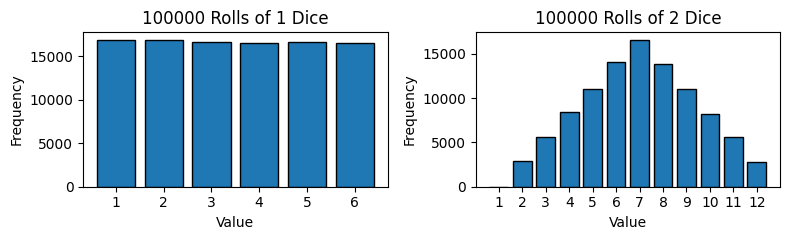

In [5]:
import matplotlib.pyplot as plt
import numpy as np
rolls = np.random.randint(1, 7, size=100000)  # Simulate rolling a dice 100,000 times
rolls_two_dice = rolls + np.random.randint(1, 7, size=100000)  # Simulate rolling two dice 100,000 times and summing the results
fig, axs = plt.subplots(1, 2, figsize=(8, 2.5))
for i, x in enumerate([rolls, rolls_two_dice]):  # Plot the distribution
    axs[i].hist(x, bins=np.arange(1, x.max() + 2) - 0.5, edgecolor='black', rwidth=0.8)
    axs[i].set_xticks(range(1, x.max() + 1))
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'100000 Rolls of {i + 1} Dice')
fig.tight_layout()

# Pseudorandom number generator

**Pseudorandom number generator** (PRNG) is an algorithm for generating a sequence of numbers whose properties approximate the properties of sequences of random numbers.

- The PRNG-generated sequence is not truly random, because it is completely determined by an initial value, called *seed*
- Pseudorandom number generators are important in practice for their reproducibility.

`train_test_split(..., random_state=seed)` randomly shuffles data before the split is implemented.

`random_state=seed` controls the randomness of the shuffle. This is essential

- *Reproducibility*: By using the same random_state, you can ensure that others can replicate your results exactly.
- *Consistency in Model Evaluation*: When comparing different models or tuning hyperparameters, the training test cannot change.
- *Debugging and Testing*: During the development phase, you might need to debug your code or test different configurations. 

In [6]:
print(np.random.randint(1, 7, size=10))
print(np.random.randint(1, 7, size=10))
np.random.seed(42)
print(np.random.randint(1, 7, size=10))
np.random.seed(42)
print(np.random.randint(1, 7, size=10))
np.random.seed(42)
print(np.random.randint(1, 7, size=10))
print(np.random.randint(1, 7, size=10))

[1 4 4 5 1 2 2 1 3 1]
[1 2 1 5 4 1 3 2 2 4]
[4 5 3 5 5 2 3 3 3 5]
[4 5 3 5 5 2 3 3 3 5]
[4 5 3 5 5 2 3 3 3 5]
[4 3 6 5 2 4 6 6 2 4]


# Why `42`?

![](https://images.squarespace-cdn.com/content/v1/5e5adeb728b6773d1974b095/1590696950003-QTYPKSV7KQWJYYDRN27J/frankaffe-the-answer-to-life-is-42.jpg)

# Decision tree

In [7]:
# Import the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Instantiate and fit the model (on the training set)
clf = DecisionTreeClassifier(max_depth=2, random_state=seed)
# Train the model
clf.fit(X_train, y_train)
# Predict new values
y_pred = clf.predict(X_test)
# Evaluate the model (on the test set)
accuracy_score(y_test, y_pred)

0.9666666666666667

## Plotting the tree

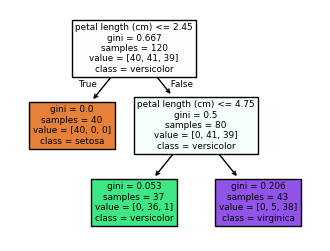

In [8]:
from sklearn.tree import plot_tree
plt.figure(figsize=(4, 3))
plot_tree(clf, feature_names=df.columns, class_names=['setosa', 'versicolor', 'virginica'], filled=True);

Checking feature relevance

In [9]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})  # Create a DataFrame to display feature importance
feature_importance_df = feature_importance_df.sort_values(['Importance', 'Feature'], ascending=[False, True])  # Sort the DataFrame by importance in descending order
feature_importance_df  # Display the feature importance 

,Feature,Importance
2,petal length (cm),1.0
3,petal width (cm),0.0
0,sepal length (cm),0.0
1,sepal width (cm),0.0


# `petal` vs `sepal`

In [10]:
#| echo: false

# Map target labels to class names
class_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
target_names = [class_names[i] for i in range(len(class_names))]

# Get the two features with the highest importance
def plot(df, model, features):
  # Create a scatter plot
  plt.figure(figsize=(3.5, 2.5))
  for x in df["species"].unique():
      plt.scatter(df[df["species"] == x][features[0]], df[df["species"] == x][features[1]])
  plt.xlabel(features[0])
  plt.ylabel(features[1])
  plt.tight_layout()
  plt.show()

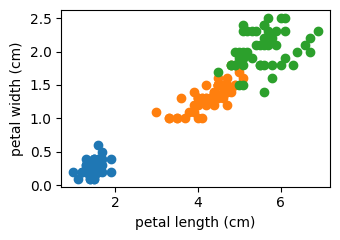

In [11]:
plot(df, clf, feature_importance_df['Feature'].iloc[:2].tolist())  # plot the 2 most important features

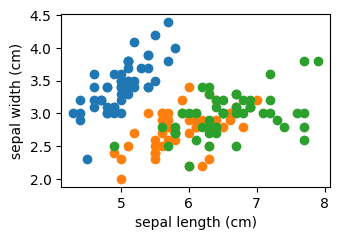

In [12]:
plot(df, clf, feature_importance_df['Feature'].iloc[2:].tolist())  # plot the 2 lest important features

# Tuning `max_depth` 

What do you expect?

In [13]:
#| echo: false
#! output: false
 
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

xlabel = "petal_length"
ylabel = "petal_width"
ctitle = "IRIS"
legend = "species"
figsize = (8,6)
xlim=[0, 7]
ylim=[0, 3]
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Define the colormap (Tableau)
my_colors=['#1f77b4', '#ff7f0e', '#2ca02c']
tableau_cmap = ListedColormap(my_colors)

def plot_boundary(clf, title, norm=False):
    # Load Iris dataset
    iris = load_iris()

    cxlim = xlim if not norm else [-0.02, 1.02]
    cylim = ylim if not norm else [-0.02, 1.02]

    X = iris.data[:, 2:4]  # Selecting petal width and petal length columns
    y = iris.target
    
    if norm:
      scaler = MinMaxScaler(feature_range=(0, 1))
      X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    # Train a classifier
    clf.fit(X_train, y_train)
    # y_pred = clf.predict(X_test)

    # Create a meshgrid for plotting decision boundaries
    x_min, x_max = [cxlim[0] - 0.5, cxlim[1] + 0.5] # X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = [cylim[0] - 0.5, cylim[1] + 0.5] # X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005), np.arange(y_min, y_max, 0.005))

    # Predict the class for each point in the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.figure(figsize=figsize)
    plt.contour(xx, yy, Z, colors='white', linewidths=1, alpha=0.8)
    plt.contourf(xx, yy, Z, cmap=tableau_cmap, alpha=0.3)

    # Plot the dataset points
    for i, class_name in enumerate(target_names):
        class_data = X_train[y_train == i]
        plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, marker='o', color=my_colors[i], edgecolor='k', s=70)
        class_data = X_test[y_test == i]
        plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name + " (test)", marker='^', color=my_colors[i], edgecolor='k', s=70)

    legend_elements = [
                      # Line2D([0], [0], marker='s', color='w', label=' ', markerfacecolor='w', markeredgecolor='w', markersize=10),
                      Line2D([0], [0], marker=None, color='w', label=legend, markerfacecolor='w', markeredgecolor='w', markersize=10),
                      Line2D([0], [0], marker='o',  color='w', label='Setosa', markerfacecolor='tab:blue', markeredgecolor='w', markersize=10),
                      Line2D([0], [0], marker='o',  color='w', label='Versicolor', markerfacecolor='tab:orange', markeredgecolor='w', markersize=10),
                      Line2D([0], [0], marker='o',  color='w', label='Virginica', markerfacecolor='tab:green', markeredgecolor='w', markersize=10),
                      
                      Line2D([0], [0], marker=None, color='w', label='Set',      markerfacecolor=None,     markeredgecolor='w', markersize=10),
                      Line2D([0], [0], marker='o',  color='w', label='Training', markerfacecolor='white',  markeredgecolor='black', markersize=10),
                      Line2D([0], [0], marker='^',  color='w', label='Test',     markerfacecolor='white',  markeredgecolor='black', markersize=10),
                ]

    plt.legend(handles=legend_elements, loc=2, ncol=2)

    plt.xlim(cxlim)
    plt.ylim(cylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(ctitle)
    # plt.legend(title=legend, loc=2)

    return clf

# Decision boundaries: `max_depth=1`

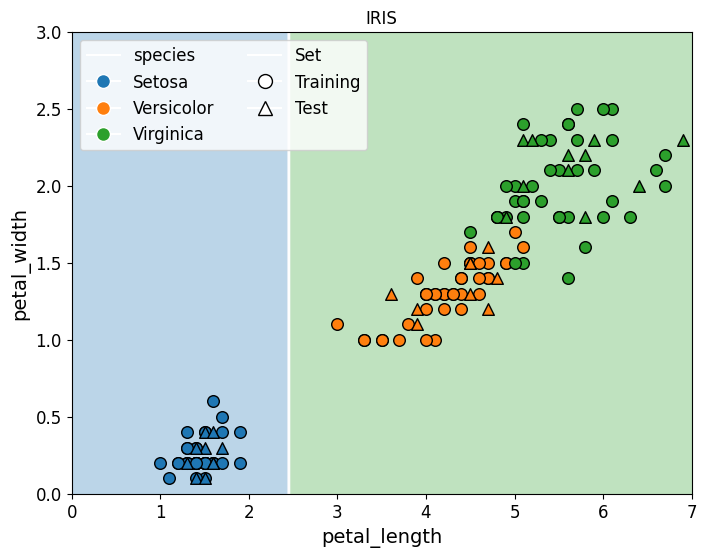

In [14]:
tree = plot_boundary(DecisionTreeClassifier(max_depth=1, random_state=seed), "decisiontree_cplot")

# Decision boundaries: `max_depth=2`

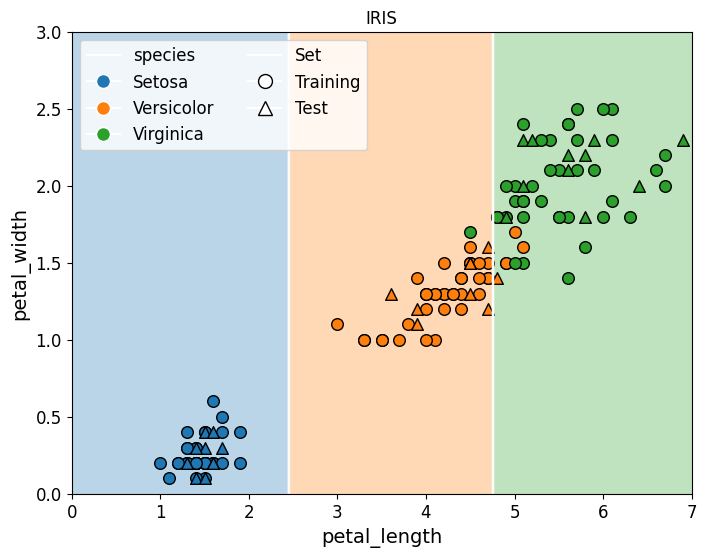

In [15]:
tree = plot_boundary(DecisionTreeClassifier(max_depth=2, random_state=seed), "decisiontree_cplot")

# Decision boundaries: `max_depth=2` (changing the random seed)

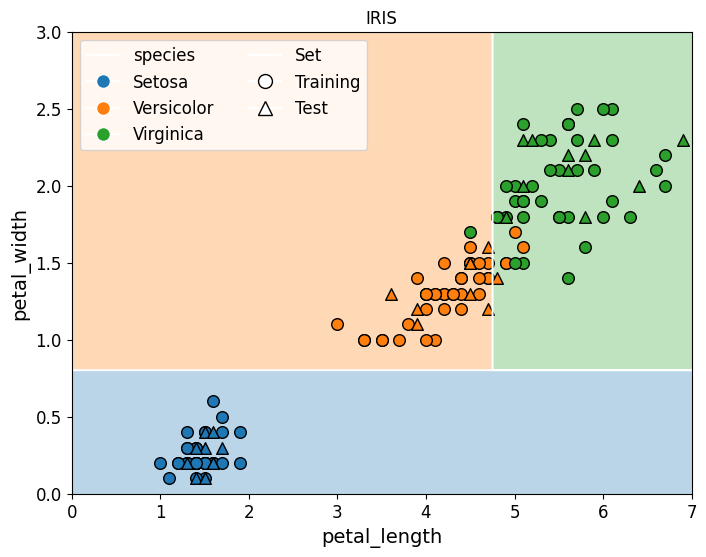

In [16]:
tree = plot_boundary(DecisionTreeClassifier(max_depth=2, random_state=1), "decisiontree_cplot")

# Decision boundaries: `max_depth=3`

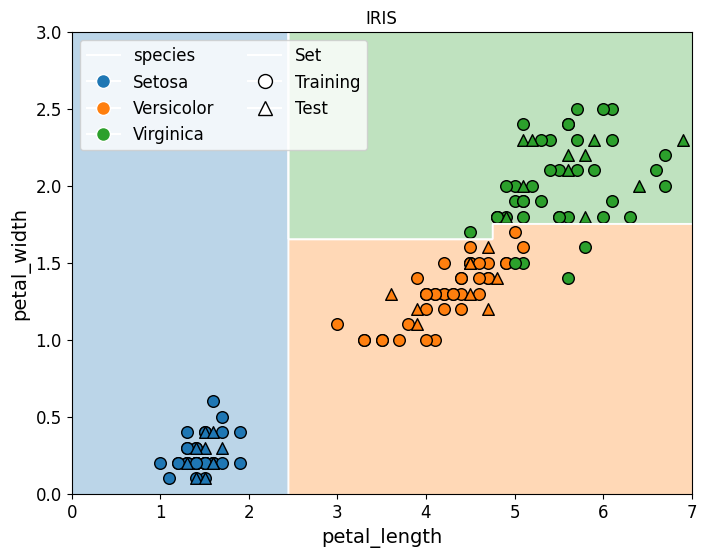

In [17]:
tree = plot_boundary(DecisionTreeClassifier(max_depth=3, random_state=seed), "decisiontree_cplot")

# Decision boundaries: `max_depth=6`

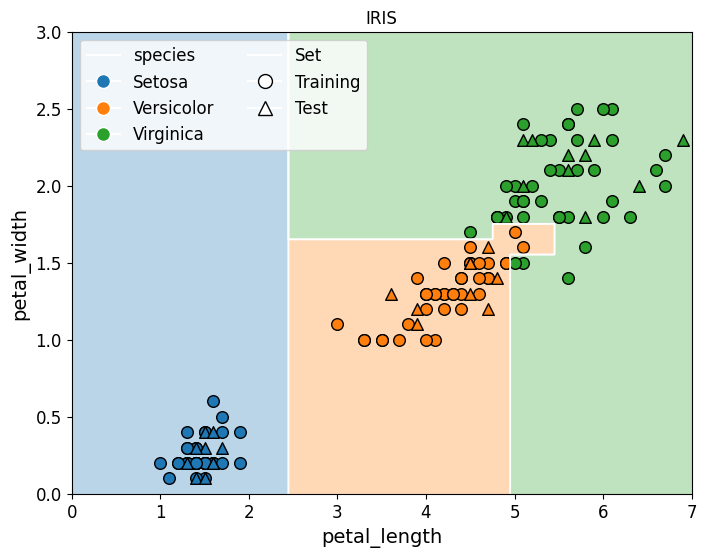

In [18]:
tree = plot_boundary(DecisionTreeClassifier(max_depth=6, random_state=seed), "decisiontree_cplot")

# Plotting the accuracy

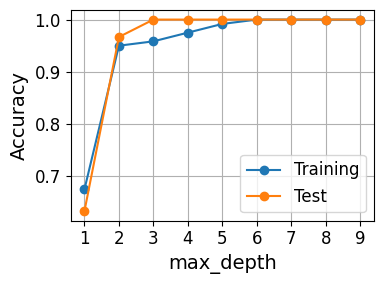

In [19]:
# Prepare to store max_depth values and corresponding accuracies
max_depths = range(1, 10)
train_accuracies, test_accuracies = [], []
for max_depth in max_depths:  # Train decision trees with increasing max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=seed)
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))  # Compute accuracy for training set
    test_acc = accuracy_score(y_test, clf.predict(X_test))  # Compute accuracy for test set
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
# Plot accuracies
plt.figure(figsize=(4, 3))
plt.plot(max_depths, train_accuracies, label="Training", marker='o')
plt.plot(max_depths, test_accuracies, label="Test", marker='o')
plt.xticks(max_depths)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()


# k-Nearest Neighbors

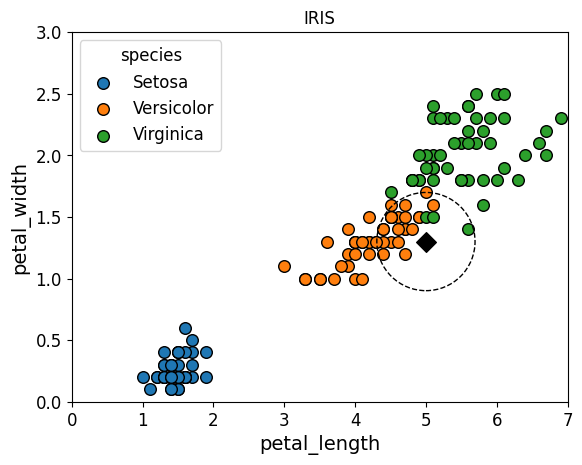

In [20]:
#| echo: false

X = iris.data[:, 2:4]  # Selecting petal width and petal length columns
y = iris.target
# Plot the dataset points
for i, class_name in enumerate(target_names):
    class_data = X[y == i]
    plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, edgecolor='k', s=70)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(ctitle)
plt.legend(title=legend, loc=2)

# for ext in ["svg", "pdf", "jpg"]:
#   plt.savefig(f'iris.{ext}')

plt.scatter(5, 1.3, s=5000, facecolors='none', edgecolors='black', linestyle='--')
plt.scatter(5, 1.3, s=100, marker="D", facecolors='black', edgecolors='black')

# for ext in ["svg", "pdf", "jpg"]:
#   plt.savefig(f'knn.{ext}')

# Tuning `k` 

What do you expect?

# Decision boundaries: `k=1` (no normalization)

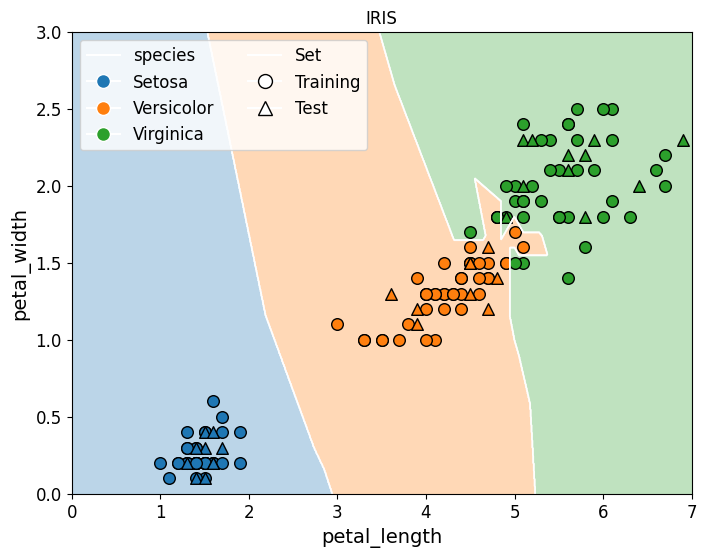

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = plot_boundary(KNeighborsClassifier(n_neighbors=1), "knn_cplot", norm=False)

# Decision boundaries: `k=1` (min-max normalization)

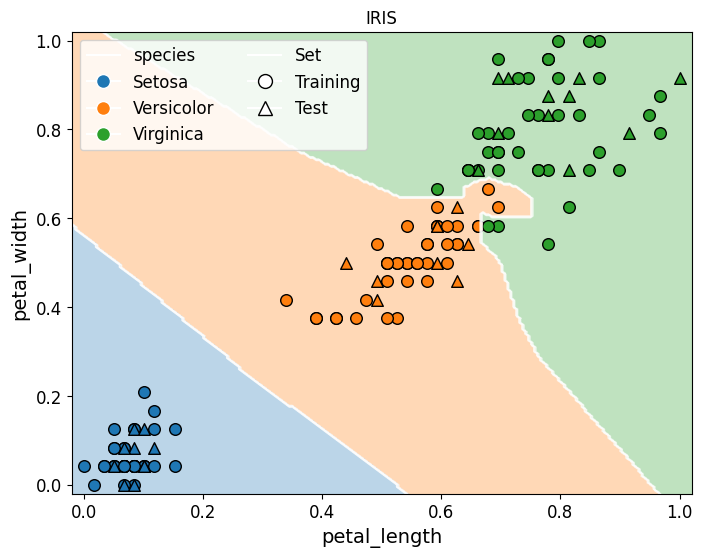

In [30]:
knn = plot_boundary(KNeighborsClassifier(n_neighbors=1), "knn_cplot", norm=True)

# Decision boundaries: `k=10` (min-max normalization)

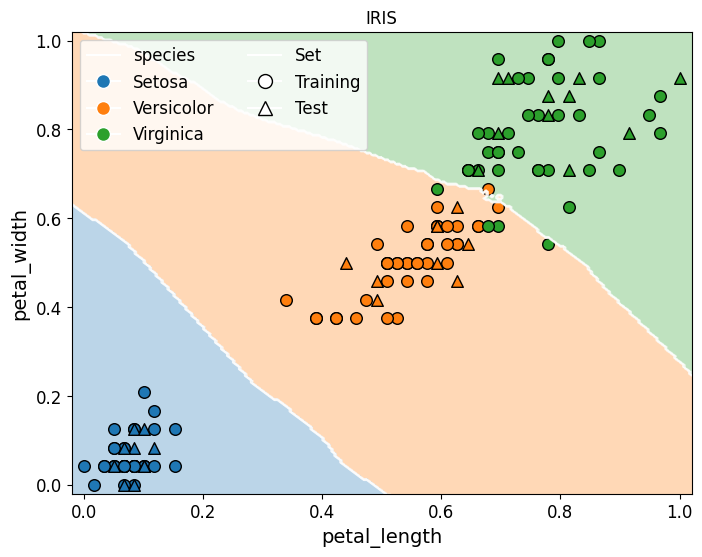

In [28]:
knn = plot_boundary(KNeighborsClassifier(n_neighbors=10), "knn_cplot", norm=True)

# Plotting the accuracy

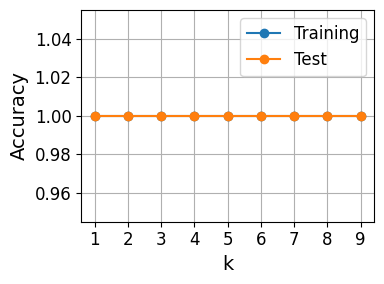

In [23]:
# Prepare to store max_depth values and corresponding accuracies
k_s = range(1, 10)
train_accuracies, test_accuracies = [], []
for k in k_s:  # Train decision trees with increasing max_depth
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))  # Compute accuracy for training set
    test_acc = accuracy_score(y_test, clf.predict(X_test))  # Compute accuracy for test set
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
# Plot accuracies
plt.figure(figsize=(4, 3))
plt.plot(max_depths, train_accuracies, label="Training", marker='o')
plt.plot(max_depths, test_accuracies, label="Test", marker='o')
plt.xticks(max_depths)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()


# Perceptron

Perceptron is binary classifier.
How can we use it in Iris? 

# One Versus All

:::: {.columns}
::: {.column width="60%"}

One Versus All (OVA) strategy for multiclasses

- OVA provides a way to use binary classification for a series of yes or no predictions across multiple possible labels.
- Given a classification problem with N possible solutions, a OVA solution consists of N separate binary classifiers—one binary classifier for each possible outcome.
- During training, the model runs through a sequence of binary classifiers, training each to answer a separate classification question.
- Finally, pick the prediction of a non -zero class which is the most certain and use argmax of these score(class index with largest score) is then used to predict a class.

:::
::: {.column width="40%"}

For example, given a picture of a piece of fruit, four different recognizers might be trained, each answering a different yes/no question:

    Is this image an apple?
    Is this image an orange?
    Is this image a banana?
    Is this image a grape?

![](https://developers.google.com/static/machine-learning/crash-course/neural-networks/images/one_vs_all_binary_classifiers.png)

:::
::::




# Perceptron

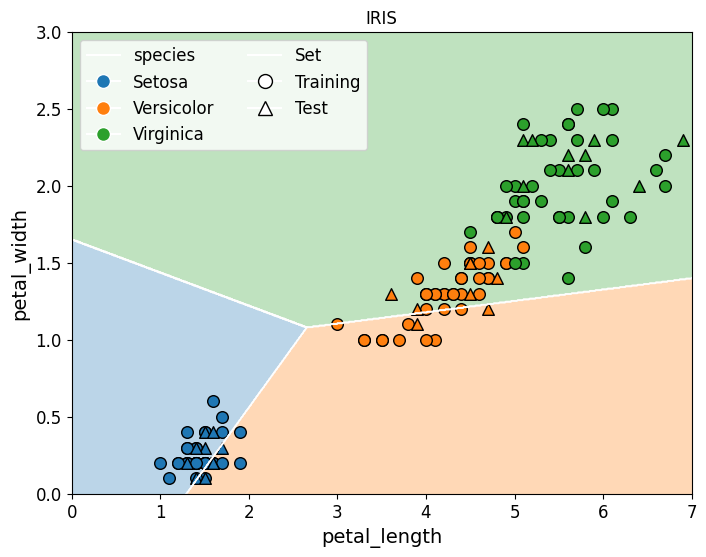

In [29]:
from sklearn.linear_model import Perceptron

perceptron = plot_boundary(Perceptron(random_state=seed), "perceptron_cplot")

# Perceptron: changing the seed

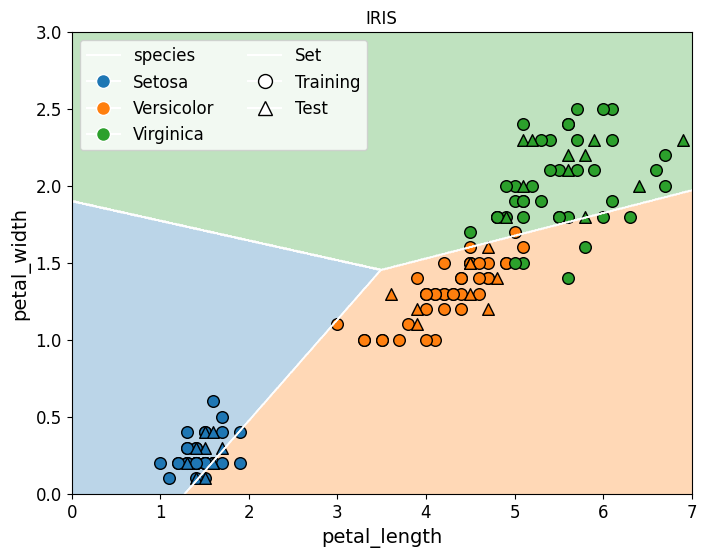

In [26]:
perceptron = plot_boundary(Perceptron(random_state=1), "perceptron_cplot")

# Multi-layer perceptron

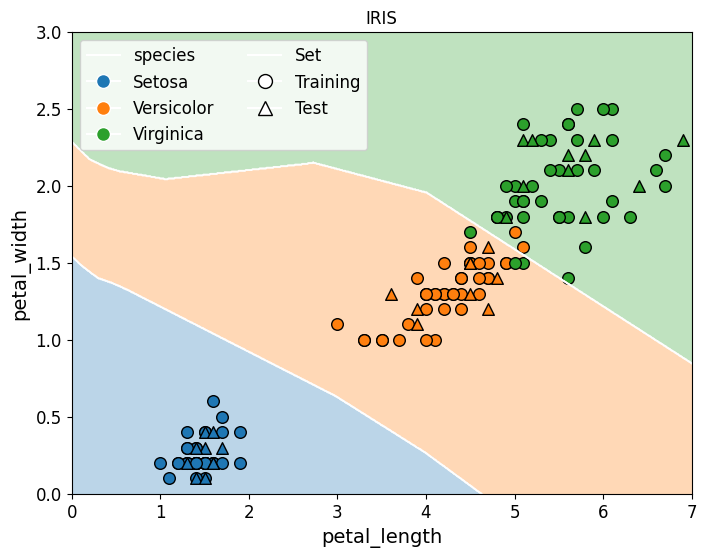

In [27]:
from sklearn.neural_network import MLPClassifier

mlp = plot_boundary(MLPClassifier(hidden_layer_sizes=(10, 20), random_state=seed, max_iter=1000), "mlp_cplot")